In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [55]:
results = pd.read_csv("benchmark_results.csv")
results.head()

,dataset,index_name,build_time,search_time,recall,qps,memory_bytes,index_params
0,sift-128-euclidean,HENN+NSW-Random,0.475944,0.028081,0.9922,2625.971442,20480000,NaN
1,sift-128-euclidean,HENN+KNN-Random,62.563441,0.394581,0.9906,2534.331847,20480000,NaN
2,sift-128-euclidean,IndexHNSW,0.207759,0.024082,0.9994,41524.473309,20480000,NaN
3,sift-128-euclidean,IndexLSH,0.066743,0.120286,0.6240,8313.487328,20480000,NaN
4,sift-128-euclidean,IndexIVF+PQ,48.367625,0.149925,0.5174,6670.001956,20480000,NaN


In [56]:
method_names = {
    "HENN+NSW-Random": "HENN + NSW (FAISS)",
    "HENN+KNN-Random": "HENN + KNN (FAISS)",
    "IndexHNSW": "FAISS HNSW",
    "IndexLSH": "FAISS LSH",
    "IndexIVF+PQ": "FAISS IVF + PQ",
    "IndexNSG": "FAISS NSG",
    "IndexFlat": "FAISS Flat",
}

dataset_names = {
    "sift-128": "SIFT",
    "gist-960": "GIST",
    "fashion-mnist-784": "Fashion-MNIST",
    "synthetic-128": "Synthetic",
}

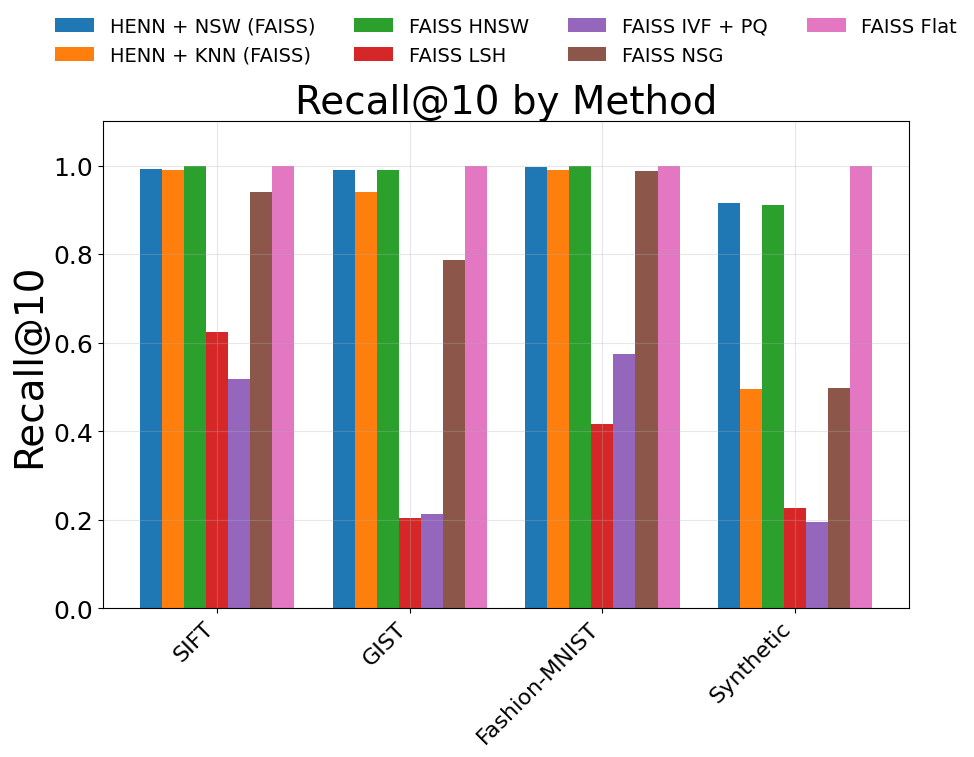

In [ ]:
# Create a plot comparing recall per method on different datasets
fig, ax = plt.subplots(figsize=(10, 8))

# Get unique datasets and methods
datasets = results['dataset'].unique()
methods = results['index_name'].unique()

# Set up the plot
x = np.arange(len(datasets))
width = 0.8 / len(methods)

# Plot bars for each method
for i, method in enumerate(methods):
    method_data = results[results['index_name'] == method]
    recalls = []
    for dataset in datasets:
        dataset_recall = method_data[method_data['dataset'] == dataset]['recall'].values
        recalls.append(dataset_recall[0] if len(dataset_recall) > 0 else 0)
    
    # Use method_names for display label
    display_name = method_names.get(method, method)
    ax.bar(x + i * width, recalls, width, label=display_name)

# Customize the plot
# ax.set_xlabel('Dataset', fontsize=28)
ax.set_ylabel('Recall@10', fontsize=28)
ax.set_title('Recall@10 by Method', fontsize=28)
ax.set_xticks(x + width * (len(methods) - 1) / 2)
# ax.set_xticklabels(datasets, rotation=0, ha='right')
# ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=16)
ax.legend(
    bbox_to_anchor=(0.5, 1.25),
    loc="upper center",
    fontsize=14,
    ncol=4,        # number of columns to split into
    frameon=False
)

ax.grid(True, alpha=0.3)
ax.set_ylim(0, 1.1)

plt.yticks(fontsize=18)
plt.xticks(fontsize=16)

# Remove 'euclidean' from dataset names for cleaner display
clean_dataset_names = [dataset_names[name.replace('-euclidean', '')] for name in datasets]

# Update the plot with cleaned dataset names
ax.set_xticklabels(clean_dataset_names, rotation=45, ha='right')

plt.tight_layout()

# plt.savefig("benchmark_recall_comparison.png", bbox_inches='tight')
plt.show()

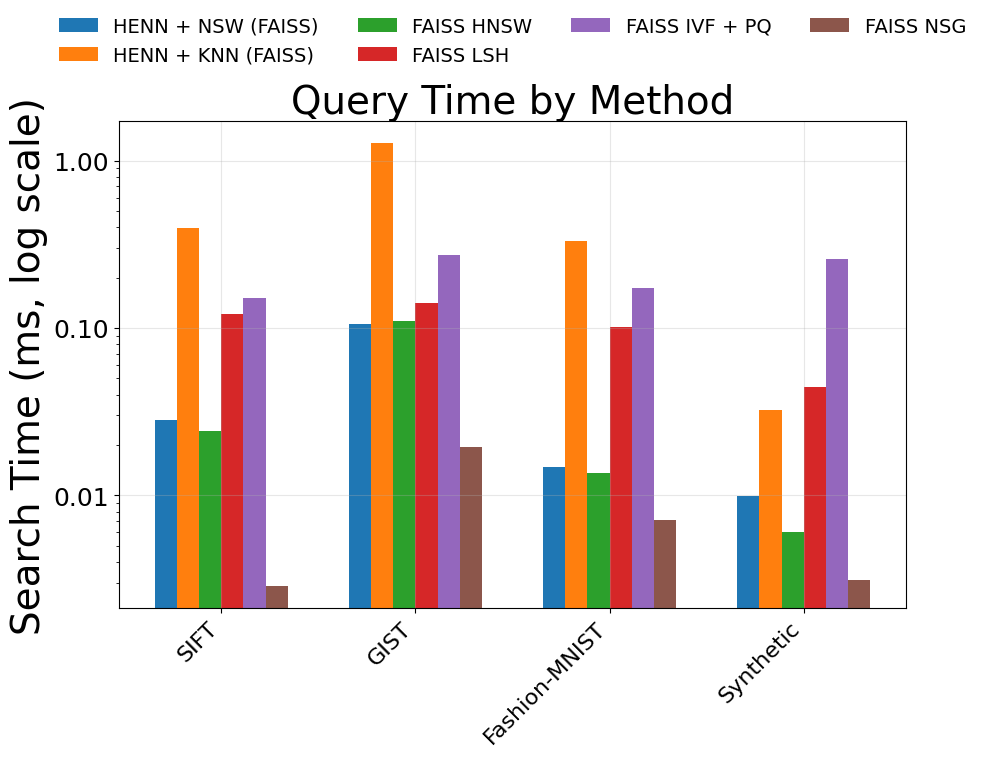

In [61]:

from matplotlib.ticker import LogLocator, ScalarFormatter
# Create a plot comparing search time per method on different datasets (excluding FAISS Flat)
fig, ax = plt.subplots(figsize=(10, 8))

# Filter out FAISS Flat method
methods_filtered = [m for m in methods if m != 'IndexFlat']

# Plot bars for each method (excluding FAISS Flat)
for i, method in enumerate(methods_filtered):
    method_data = results[results['index_name'] == method]
    search_times = []
    for dataset in datasets:
        dataset_search_time = method_data[method_data['dataset'] == dataset]['search_time'].values
        search_times.append(dataset_search_time[0] if len(dataset_search_time) > 0 else 0)
    
    # Use method_names for display label
    display_name = method_names.get(method, method)
    ax.bar(x + i * width, search_times, width, label=display_name)

# Customize the plot
ax.set_ylabel('Query Time (ms)', fontsize=28)
ax.set_title('Query Time by Method', fontsize=28)
ax.set_xticks(x + width * (len(methods_filtered) - 1) / 2)
ax.legend(
    bbox_to_anchor=(0.5, 1.25),
    loc="upper center",
    fontsize=14,
    ncol=4,
    frameon=False
)

ax.grid(True, alpha=0.3)
ax.set_xticklabels(clean_dataset_names, rotation=45, ha='right')

ax.set_yscale('log')
ax.yaxis.set_major_locator(LogLocator(base=10))
ax.yaxis.set_major_formatter(ScalarFormatter())
# ax.yaxis.set_minor_locator(LogLocator(base=10, subs=range(2, 10)))
# ax.yaxis.set_minor_formatter(ScalarFormatter())  # optional
ax.set_ylabel('Search Time (ms, log scale)', fontsize=28)

plt.yticks(fontsize=18)
plt.xticks(fontsize=16)
plt.tight_layout()

# plt.savefig("benchmark_query_time_comparison.png", bbox_inches='tight')

plt.show()

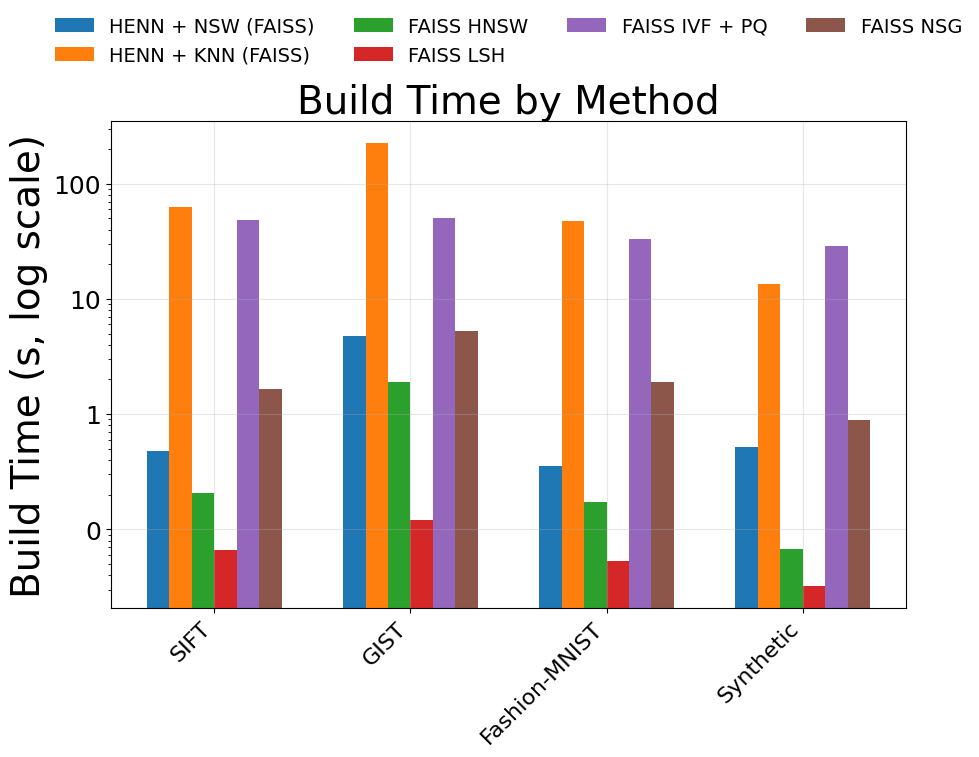

In [62]:
# Create a plot comparing build time per method on different datasets (excluding FAISS Flat)
fig, ax = plt.subplots(figsize=(10, 8))

# Plot bars for each method (excluding FAISS Flat)
for i, method in enumerate(methods_filtered):
    method_data = results[results['index_name'] == method]
    build_times = []
    for dataset in datasets:
        dataset_build_time = method_data[method_data['dataset'] == dataset]['build_time'].values
        build_times.append(dataset_build_time[0] if len(dataset_build_time) > 0 else 0)
    
    # Use method_names for display label
    display_name = method_names.get(method, method)
    ax.bar(x + i * width, build_times, width, label=display_name)

# Customize the plot
ax.set_ylabel('Build Time (s)', fontsize=28)
ax.set_title('Build Time by Method', fontsize=28)
ax.set_xticks(x + width * (len(methods_filtered) - 1) / 2)
ax.legend(
    bbox_to_anchor=(0.5, 1.25),
    loc="upper center",
    fontsize=14,
    ncol=4,
    frameon=False
)

ax.grid(True, alpha=0.3)
ax.set_xticklabels(clean_dataset_names, rotation=45, ha='right')

ax.set_yscale('log')
ax.yaxis.set_major_locator(LogLocator(base=10))
ax.yaxis.set_major_formatter(ScalarFormatter())
ax.set_ylabel('Build Time (s, log scale)', fontsize=28)

plt.yticks(fontsize=18)
plt.xticks(fontsize=16)
plt.tight_layout()
# plt.savefig("benchmark_build_time_comparison.png", bbox_inches='tight')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import LogLocator, ScalarFormatter
from matplotlib import rcParams

# --- Inputs expected: results (DataFrame), method_names (dict), dataset_names (dict) ---

# Unique datasets & methods
datasets = results['dataset'].unique()
methods = results['index_name'].unique()
methods_filtered = [m for m in methods if m != 'IndexFlat']

# X positions and display dataset names
x = np.arange(len(datasets))
clean_dataset_names = [dataset_names[name.replace('-euclidean', '')] for name in datasets]

# Figure & axes
fig, axes = plt.subplots(1, 3, figsize=(22, 7))
ax_recall, ax_qtime, ax_btime = axes

# ---------- 1) Recall@10 ----------
width_recall = 0.8 / len(methods)
recall_handles = []
recall_labels = []

for i, method in enumerate(methods):
    method_data = results[results['index_name'] == method]
    recalls = []
    for d in datasets:
        vals = method_data[method_data['dataset'] == d]['recall'].values
        recalls.append(vals[0] if len(vals) > 0 else 0)
    display_name = method_names.get(method, method)
    bars = ax_recall.bar(x + i * width_recall, recalls, width_recall, label=display_name)
    # Save legend entries only from this (complete) subplot
    recall_handles.append(bars[0])
    recall_labels.append(display_name)

ax_recall.set_title('Recall@10 by Method', fontsize=28)
ax_recall.set_ylabel('Recall@10', fontsize=22)
ax_recall.set_xticks(x + width_recall * (len(methods) - 1) / 2)
ax_recall.set_xticklabels(clean_dataset_names, rotation=45, ha='right')
ax_recall.set_ylim(0, 1.1)
ax_recall.grid(True, alpha=0.3)
ax_recall.tick_params(axis='both', labelsize=20)

# ---------- 2) Query Time (log) ----------
width_q = 0.8 / len(methods_filtered) if len(methods_filtered) else 0.8
for i, method in enumerate(methods_filtered):
    method_data = results[results['index_name'] == method]
    search_times = []
    for d in datasets:
        vals = method_data[method_data['dataset'] == d]['search_time'].values
        search_times.append(vals[0] if len(vals) > 0 else 0)
    # No labels here to avoid duplicate legend entries
    ax_qtime.bar(x + i * width_q, search_times, width_q)

ax_qtime.set_title('Query Time by Method', fontsize=28)
ax_qtime.set_ylabel('Search Time (ms, log scale)', fontsize=22)
ax_qtime.set_xticks(x + width_q * (len(methods_filtered) - 1) / 2)
ax_qtime.set_xticklabels(clean_dataset_names, rotation=45, ha='right')
ax_qtime.set_yscale('log')
ax_qtime.yaxis.set_major_locator(LogLocator(base=10))
ax_qtime.yaxis.set_major_formatter(ScalarFormatter())
ax_qtime.grid(True, alpha=0.3, which='both')
ax_qtime.tick_params(axis='both', labelsize=20)

# ---------- 3) Build Time (log) ----------
width_b = 0.8 / len(methods_filtered) if len(methods_filtered) else 0.8
for i, method in enumerate(methods_filtered):
    method_data = results[results['index_name'] == method]
    build_times = []
    for d in datasets:
        vals = method_data[method_data['dataset'] == d]['build_time'].values
        build_times.append(vals[0] if len(vals) > 0 else 0)
    # No labels here to avoid duplicate legend entries
    ax_btime.bar(x + i * width_b, build_times, width_b)

ax_btime.set_title('Build Time by Method', fontsize=28)
ax_btime.set_ylabel('Build Time (s, log scale)', fontsize=22)
ax_btime.set_xticks(x + width_b * (len(methods_filtered) - 1) / 2)
ax_btime.set_xticklabels(clean_dataset_names, rotation=45, ha='right')
ax_btime.set_yscale('log')
ax_btime.yaxis.set_major_locator(LogLocator(base=10))
ax_btime.yaxis.set_major_formatter(ScalarFormatter())
ax_btime.grid(True, alpha=0.3, which='both')
ax_btime.tick_params(axis='both', labelsize=20)

# ---------- One shared legend (from the Recall subplot, which includes ALL methods) ----------
# ncols = min(1, len(recall_labels))
fig.legend(recall_handles, recall_labels, loc='upper center', bbox_to_anchor=(0.5, 1.14),
           ncol=5, frameon=False, fontsize=20)

# Spacing so the legend has room
plt.tight_layout(rect=[0, 0, 1, 0.98])

# Optional: common super-title
# fig.suptitle('ANN Benchmark Summary', y=1.06, fontsize=22)
plt.savefig("benchmark_summary.png", bbox_inches='tight')
plt.show()
